In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap

In [3]:
#Data preprocessing
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df['price_range'].describe(), df['price_range'].unique()

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0]))

<Axes: >

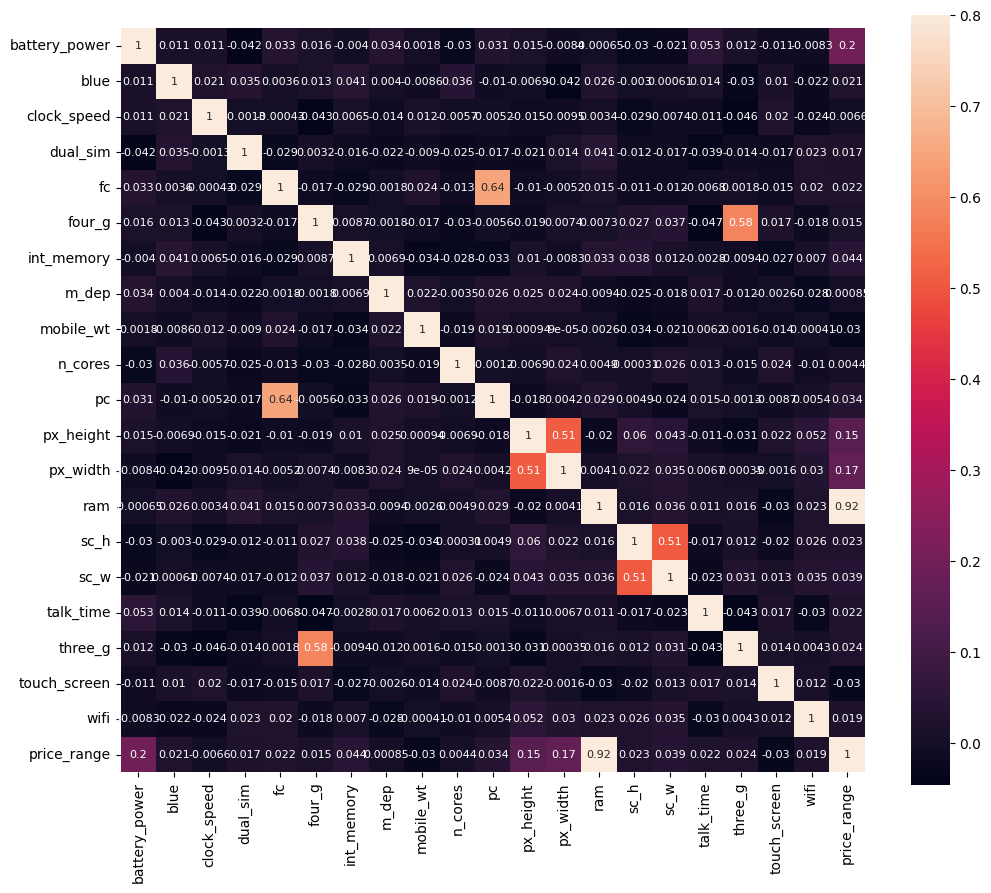

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, annot_kws={'size': 8})

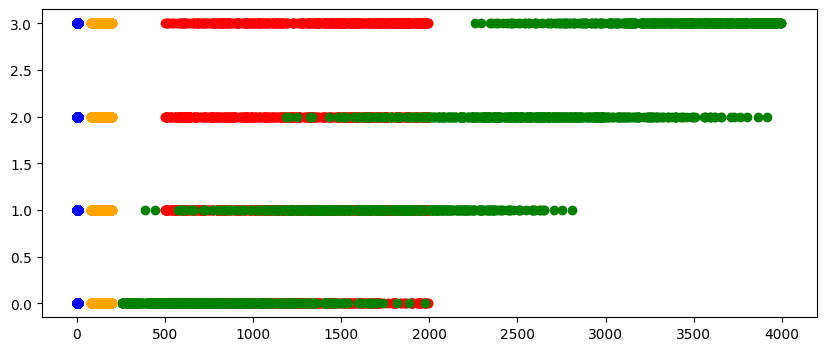

In [9]:
f, ax = plt.subplots(figsize=(10, 4))
plt.scatter(y=df['price_range'], x=df['battery_power'], color='red')
plt.scatter(y=df['price_range'], x=df['ram'], color='Green')
plt.scatter(y=df['price_range'], x=df['n_cores'], color='blue')
plt.scatter(y=df['price_range'], x=df['mobile_wt'], color='orange')


Support Vector Machine and method

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)
X_t = np.array(X_t)

print('shape of Y:' +str(y_t.shape))
print('shape of X:' +str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y:(2000,)
shape of X:(2000, 20)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print('shape of X Train:'+str(X_train.shape))
print('shape of X Test:'+str(X_test.shape))

print("shape of Y Train :"+str(y_train.shape))
print("shape of Y Test :"+str(y_test.shape))

shape of X Train:(1600, 20)
shape of X Test:(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [12]:
for this_C in [1, 3, 5, 10 ,40, 60, 80, 100]:
  clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)

  scoretrain = clf.score(X_train, y_train)
  scoretest = clf.score(X_test, y_test)

  print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".
        format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [13]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,y_train)
scores = cross_val_score(clf1,X_train,y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))

print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))


The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [17]:
from sklearn.dummy import DummyClassifier
for start in ['stratified', 'most_frequent', 'prior', 'uniform']:
  dummy_maj = DummyClassifier(strategy=strat_scores).fit(X_train, y_train)
  print("Train Stratergy :{} \n Score :{:.2f}".format(strat_scores,dummy_maj.score(X_train,y_train)))
  print("Test Stratergy :{} \n Score :{:.2f}".format(strat_scores,dummy_maj.score(X_test,y_test)))


InvalidParameterError: The 'strategy' parameter of DummyClassifier must be a str among {'constant', 'stratified', 'prior', 'most_frequent', 'uniform'}. Got array([0.95625 , 0.95    , 0.94375 , 0.971875, 0.94375 ]) instead.

In [18]:
X = np.array(df.iloc[:, [0, 13]])
y = np.array(df['price_range'])

print('Shape of X:' + str(X.shape))
print('Shape of y'+ str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y(2000,)


In [20]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

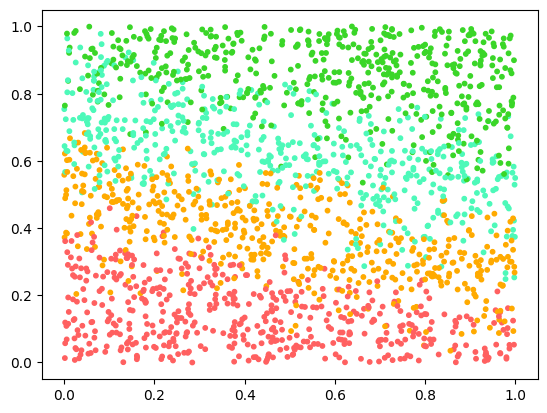

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark, s=10, label=y)
plt.show()

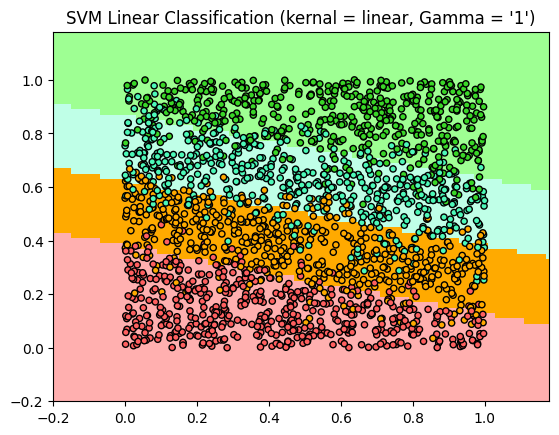

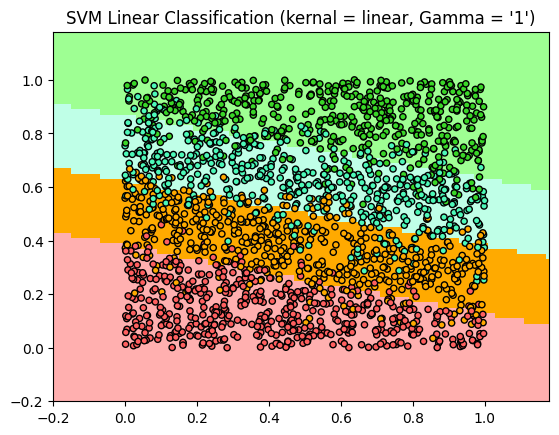

In [23]:
h = .02
C_param = 1
for weights in ['uniform', 'distance']:
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)


    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [24]:
print('The score of above:' + str(clf1.score(X,y)))

The score of above:0.825


In [25]:
#Linear Support vector machine with only C parametr
from sklearn.svm import LinearSVC

for this_C in [1, 3, 5, 10, 40, 60, 80, 100]:
  clf2 = LinearSVC(C=this_C).fit(X_train, y_train)
  scoretrain = clf2.score(X_train,y_train)
  scoretest  = clf2.score(X_test,y_test)
  print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:5, training score :0.867500 , Test Score: 0.870000 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:10, training score :0.874375 , Test Score: 0.877500 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:40, training score :0.847500 , Test Score: 0.835000 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:60, training score :0.838750 , Test Score: 0.842500 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM value of C:80, training score :0.746875 , Test Score: 0.767500 

Linear SVM value of C:100, training score :0.804375 , Test Score: 0.817500 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,y_train)))

0.92 is the accuracy of the SV Regressor
